In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import ConvexHull
from utils import from_grayscale_to_color, plot_matrix_as_image, separate_channels, before_and_after, plot_points

# What is a matrix? 

![](images/matrix.png)

In [2]:
my_matrix = np.array([[255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,255,255,255,255,255,252,254,246, 87, 79, 86, 93,252,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,255,255,255,254,109, 82, 78, 78, 76, 78, 74, 78, 78, 82, 86,254,254,255,255,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,255,255,255, 83, 79, 75, 72, 71, 71, 68, 70, 70, 72, 74, 78, 80,190,254,255,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,255,253, 82, 74, 74, 68, 68, 64, 64, 64, 64, 64, 64, 68, 74, 76, 80,120,254,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,254, 82, 76, 70, 67, 64, 64, 64, 64, 64, 64, 64, 64, 64, 66, 71, 74, 80,253,255,255,255,255,255,255,255,255,255],
                      [255,255,255,254,238, 76, 72, 66, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 71, 75, 82,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255, 76, 72, 65, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 69, 76,255,255,255,255,255,255,255,255,255],
                      [255,255,255,254, 74, 68, 64, 64, 64, 64, 64, 64, 64, 64, 63,190,203, 64, 64, 64, 64, 65, 74,254,255,255,255,255,255,255,255,255],
                      [255,255,255,253, 68, 64, 64, 64, 64, 64, 64, 64, 60,205,198,200,200,200, 64, 64, 64, 64, 68, 74,254,255,255,255,255,255,255,255],
                      [255,255,255,121, 66, 64, 64, 64, 64, 64, 64,207,200,200,200,200,200,200,201, 64, 64, 64, 64, 72,255,255,255,255,255,255,255,255],
                      [255,255,255, 76, 64, 64, 64, 69,234,238,238,240,240,240,240,240,238,236,232,228, 67, 64, 64, 63,255,255,255,255,254,254,254,254],
                      [255,255,255, 94, 64, 64,104,208,155,152,151,208,208,208,208,208,150,152,177,206,228, 64, 64, 69,255,255,255,255,251,192,192,254],
                      [255,255,255,156, 64, 64,228,213,207,209,203,202,208,208,208,212,210,210,218,208,230, 64, 64, 58,254,255,255,254,224,232,192,253],
                      [255,255,255,252, 64, 72,230,206,202,124,135,206,206,206,206,206,124,124,206,206,228, 64, 64, 68,255,255,254,250,226,250,227,254],
                      [255,255,255,242, 64, 63,230,206,112,114,114,206,241,244,244,206,114,114,118,206,228, 66, 64, 67,255,254,252,180,180,223,227,254],
                      [255,255,255,253, 64,196,229,207,204,100,206,240,197,200,201,240,199,107,204,199,225,177, 64, 69,254,211,180,180,180,180,251,255],
                      [255,255,255,255, 64, 84,197,215,234,238,243,197,200,198,198,198,238,238,232,208,197, 75, 64,238,254,180,180,180,180,180,175,255],
                      [255,255,255,252, 62, 58,200,200,200,200,198,200,201,156,200,200,200,200,198,200,198, 64, 64,254,254,130,180,180,180,180,180,251],
                      [255,255,255,254, 64, 64,196,200,200,200,198,197,198,197,198,205,197,200,200,200,198, 64, 64,254,251,180,180,180,180,180,180,253],
                      [255,255,255,254, 68, 64, 64,199,200,200,197, 93, 94, 94, 94, 93,197,200,200,198, 64, 64, 70,255,254,212,205,180,180,180,180,249],
                      [255,255,255,255, 72, 64, 64, 49,198,200,200,198,201, 94,191,198,200,200,198, 66, 64, 64, 72,254,213,210,250,208,187,180,180,252],
                      [255,255,255,255, 52, 72, 64, 64, 66,198,200,200,200,200,200,200,200,198, 64, 64, 64, 69, 78,206,206,205,209,208,204,179,179,243],
                      [255,255,255,255, 79, 76, 67, 64, 64, 83,198,198,200,200,200,198,197, 64, 64, 64, 66, 73,174,151,157,164,170,176,209,230,217,254],
                      [255,255,255,255,240, 76, 71, 68, 64, 64, 64,155,189,196,186,158, 64, 64, 64, 68, 74,169,137,144,155,167,242,172,207,228,217,250],
                      [255,255,255,255,254, 84, 79,219,225,195,195,156,158,158,158,158,195,195,225,215,138,113,117,141,149,246,162,164,205,226,215,255],
                      [255,255,255,255,219,226,228,232,209,208,208,161,158,158,158,159,208,208,210,234,232,203,114,114,114,114,150,156,205,226,213,255],
                      [255,255,255,224,227,234,235,241,243,217,217,179,179,179,179,216,217,221,244,241,239,233,191,192,117,114,114,145,203,224,211,255],
                      [255,255,227,227,234,240,244,246,246,224,224,224,174,174,174,222,224,224,246,246,244,240,238,209,250,198,200,193,235,222,207,255],
                      [255,250,230,233,242,246,246,246,220,224,224,224,167,167,167,224,224,224,233,246,246,246,239,209,246,246,246,244,232,220,208,255],
                      [255,224,232,237,244,246,246,246,246,224,224,224,159,159,159,224,224,224,246,246,246,246,239,208,246,246,246,244,230,218,227,255],
                      [255,230,236,242,246,246,246,246,246,246,226,228,154,154,154,226,226,246,246,246,246,246,235,246,246,246,246,248,231,220,251,255]
                      ])

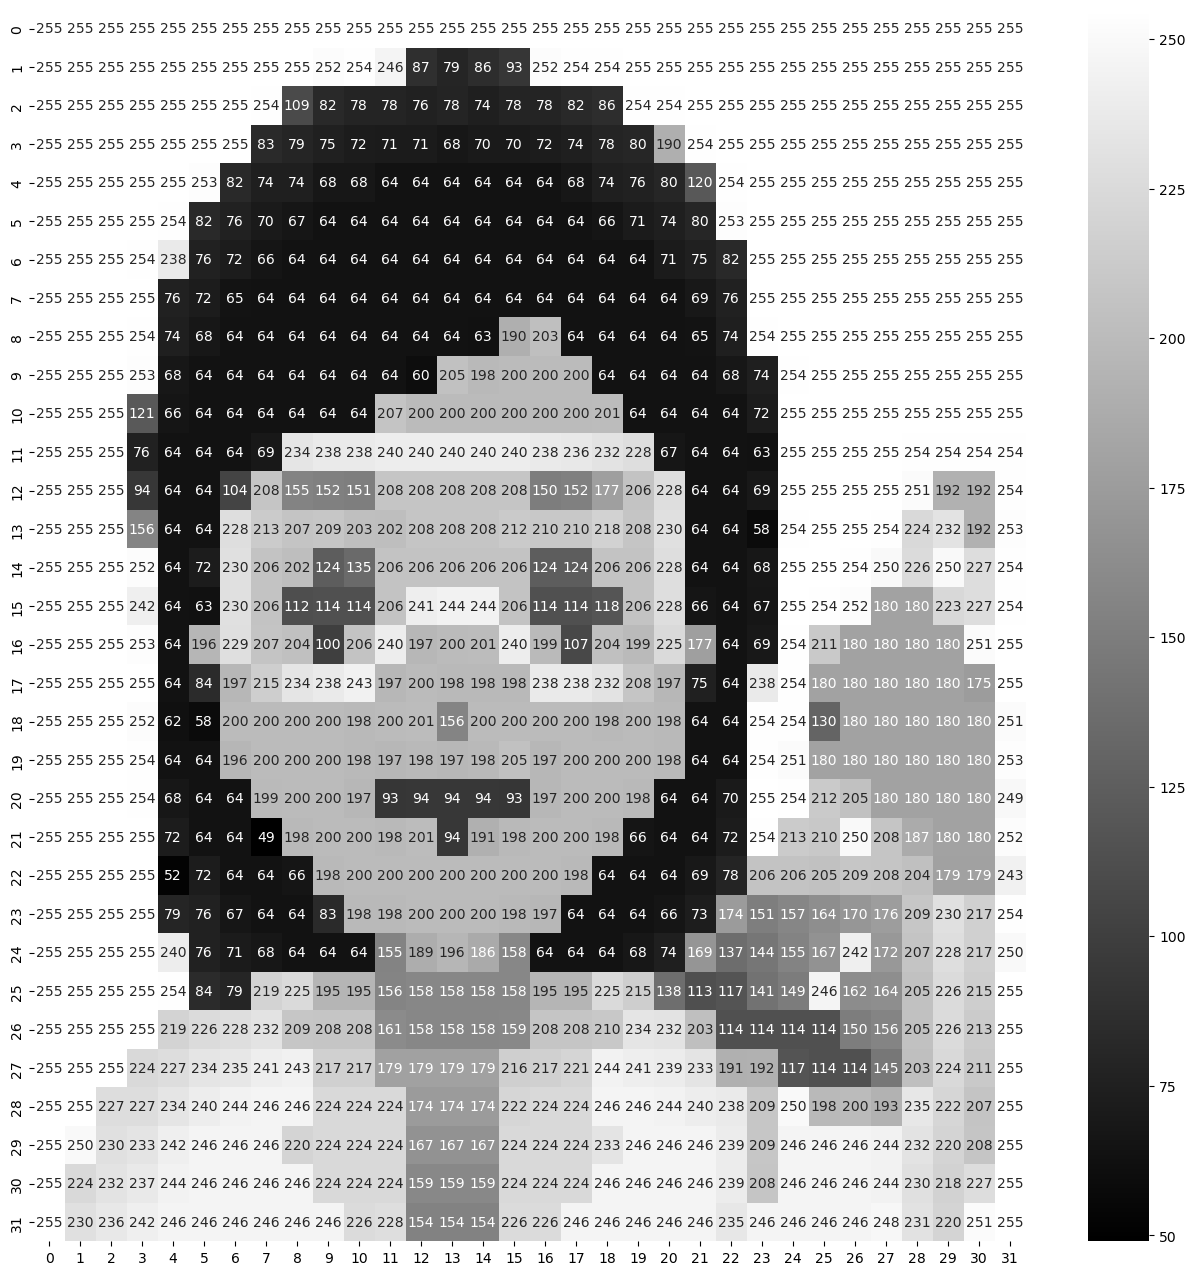

In [3]:

plot_matrix_as_image(my_matrix)

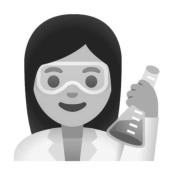

In [4]:
_img =  cv2.imread("images/img.jpg")
grayscale = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (2,2))
plt.imshow(grayscale, cmap='gray')
plt.axis("off")
plt.show()

# How do we get Color images? 

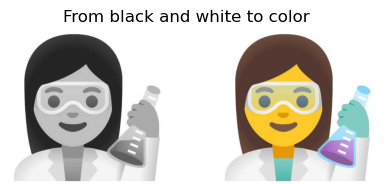

In [5]:
img = cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)
from_grayscale_to_color(grayscale, img)

ToDo: come up with 5 colors and have them test it. 
Add variable names with red, green blue. 

![](images/rgb.png)

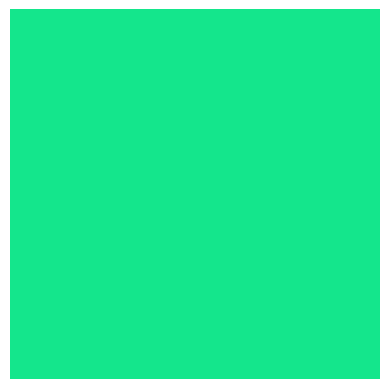

In [24]:

plt.imshow([[(20, 230, 140)]])
plt.axis("off")
plt.show()

Fun fact

The range 0-255 or 8 bits ($2^{8}$) alllows 16.7 million colour possibilities for each pixel! But why this number? Mostly, historical reasons: 8-bit microprocessors were the first widely used microprocessors in the computing industry. But you can also find 16-bit images in modern cameras or photoshop applications. 

# Putting it all together

![](images/channels.jpg)

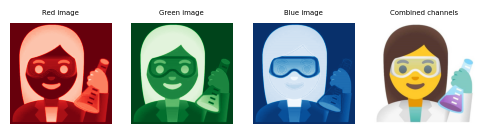

In [7]:
separate_channels(img)

# What else can we do with matrices? 



![](images/explained.png)

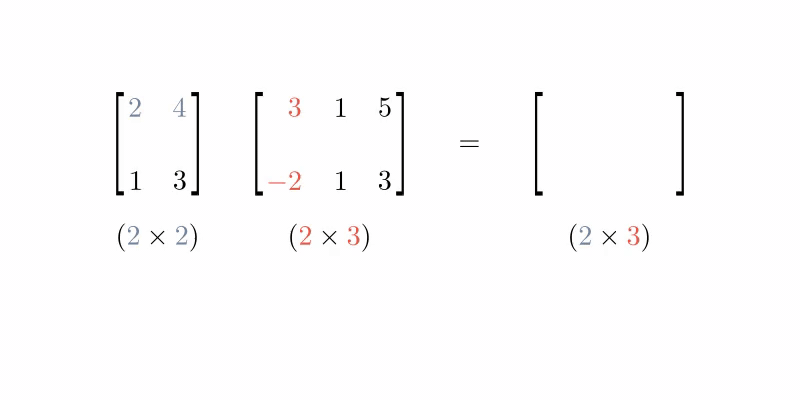

In [8]:
from IPython.display import Image
Image(filename="./images/matrix-multiplication.gif")

ToDo = explain x and y based on up and down, left and right. Also add a piture with examples
// make an exercise: 3 excercises. Make it bigger 
make it in the negative y axis 
make it smaller and bigger 

make a template with the target position and dimensions of the square. 

In [27]:
points = np.array([[0,0],[0,1],[1,1],[1,0]])
newpoints = []
a =  2
b = 0
c = 0
d = 1
tx= 2
ty= 3
M = np.float32([[a, b, tx],
            	[c, d, ty],
            	[0, 0, 1]])

for point in points:
    newx = a* point[0] + b*point[1] + tx
    newy = c* point[0] + d*point[1] + ty
    newpoints.append([newx,newy])

newpoints = np.array(newpoints)

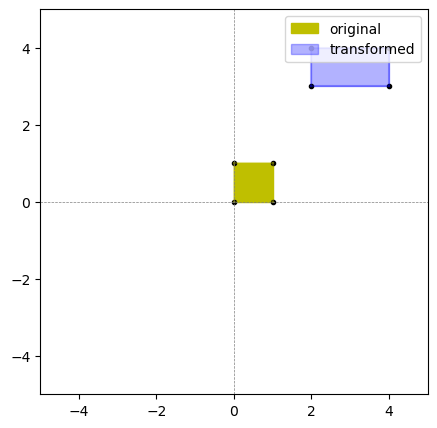

In [28]:
plot_points(points, newpoints)

# Let's try it with images!

![](images/transforms.png)

In [11]:
def translate(X,Y):
	M = np.float32([[1, 0, X],
					[0, 1, Y],
					[0, 0, 1]])
	return M 


def scale(W,H):
	M = np.float32([[W, 0, 0],
					[0, H, 0],
					[0, 0, 1]])
	return M 


def rotate(angle):
	M = np.float32([[np.cos(angle), -np.sin(angle), 0],
					[np.sin(angle), np.cos(angle), 0],
					[0, 0, 1]])
	return M 

def shearX(angle):
	M = np.float32([[1, np.tan(angle), 0],
					[0,1, 0],
					[0, 0, 1]])
	return M 


def shearY(angle):
	M = np.float32([[1, 0, 0],
					[np.tan(angle),1, 0],
					[0, 0, 1]])
	return M

def reflectX():
	M = np.float32([[1,0, 0],
					[0,-1, 0],
					[0, 0, 1]])
	return M 

def reflectY():
	M = np.float32([[-1,0, 0],
					[0,1, 0],
					[0, 0, 1]])
	return M 

def reflectOrigin():
	M = np.float32([[-1,0, 0],
					[0,-1, 0],
					[0, 0, 1]])
	return M 

In [12]:
newpoints = []
for x in range(0, img.shape[0]): 
    for y in range(0, img.shape[1]): 
        newx = M[0,0]*x + M[0,1]*y +M[0,2]
        newy = M[1,0]*x + M[1,1]*y + M[1,2]
        newpoints.append([newx,newy])

newpoints = np.array(newpoints)

In [13]:
newpoints.shape

(390625, 2)

In [14]:
maxX = np.max(abs(newpoints[:,0]))
maxY = np.max(abs(newpoints[:,1]))

In [15]:
print(maxX)
print(maxY)

126.80000185966492
2490.0


In [16]:
def transform(img, M): 
    for x,y in zip(img.shape[:1]): 
        newx = M[0,0]*x + M[0,1]*point[1] +M[0,2]
        newy = M[1,0]* point[0] + M[1,1]*point[1] + M[1,2]
        newpoints.append([newx,newy])

newpoints = np.array(newpoints)

In [17]:
def plot_image_before_after(image, M): 
    image = np.rot90(image,2)
    xRange =  image.shape[0]
    yRange =  image.shape[1]
    fig, ax = plt.subplots(ncols=1, figsize=(5,5))
    ax.imshow(image)


    plt.ylim((np.max(yRange)*-1)-1, (np.max(yRange))+1)
    plt.xlim((np.max(xRange)*-1)-1, (np.max(xRange))+1)
    plt.hlines(y=0, xmin=(np.max(xRange)*-1)-1, xmax=(np.max(xRange))+1, colors='gray',linestyles='--', lw=0.5)
    plt.vlines(x=0, ymin=(np.max(yRange)*-1)-1, ymax=(np.max(yRange))+1, colors='gray',linestyles='--', lw=0.5)
    plt.show()

In [18]:
M = np.float32([[-1, 0, 0],
            	[0, -1, 0],
            	[0, 0, 1]])

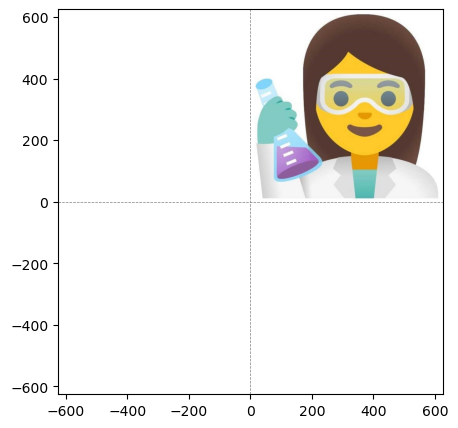

In [19]:
plot_image_before_after(img, M)

In [20]:
# get the image shape
rows, cols, dim = img.shape
#angle from degree to radian
angle = np.radians(90)
#transformation matrix for Rotation
M = np.float32([[-1, 0, 0],
            	[0, -1, 0],
            	[0, 0, 1]])
# apply a perspective transformation to the image
topright = np.array([rows, 0, 0])
topleft = np.array([0, 0, 0])
bottomright = np.array([rows, cols, 0])
bottomleft = np.array([0, cols, 0])

trM = np.matmul(topright,M)
tlM = np.matmul(topleft,M)
brM = np.matmul(bottomright,M)
blM = np.matmul(bottomleft,M)

array = np.stack((trM, tlM, brM,blM), axis=0)
newx = int(max(array[:,0]))
newy = int(max(array[:,1]))
print(newy,newx)
transformed_img = cv2.warpPerspective(img, M, (newx, newy))

0 0


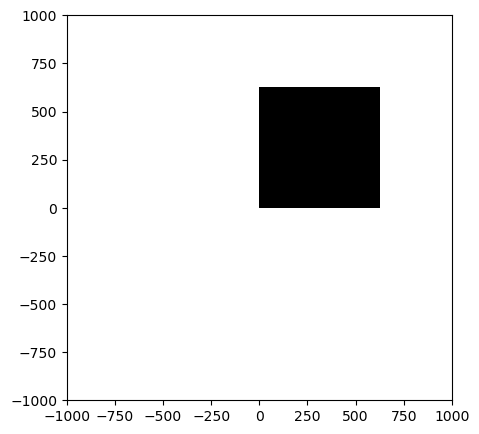

In [21]:
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
ax.set_xlim([-1000,1000])
ax.set_ylim([-1000,1000])
#ax.imshow(img)
ax.imshow(transformed_img)
plt.show()

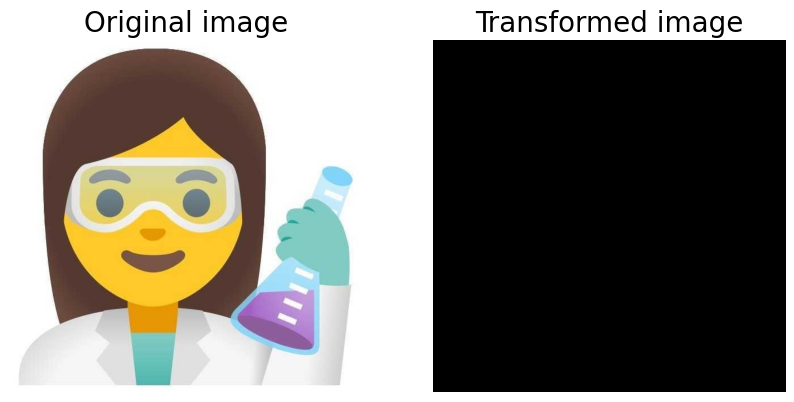

In [22]:
before_and_after(img,transformed_img )